# Lead Scoring Case Study

_Objectives of the Case Study_

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

In [28]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("muted")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# visulaisation

from matplotlib.pyplot import xticks
%matplotlib inline

# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Adjusting the display options

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

## Data Reading

In [3]:
#Importing the dataset

df_leads = pd.read_csv("C:\\Users\\manog\\Downloads\\Leads.csv")

In [4]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df_leads.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [6]:
df_leads.shape

(9240, 37)

In [7]:
# Checking for duplicate values

sum(df_leads.duplicated(subset = 'Prospect ID')) == 0

True

No duplicate values

In [8]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# checking number of unique values in each column

df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## Data Cleaning

Treatment for 'Select' values

As we can see, several columns have 'Select' values. This is the result of the client not selecting any item from the list; thus, Select is displayed. Select values are as good as NULL

In [11]:
# List of columns having 'Select' as value

cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [12]:
# Converting 'Select' values to NaN.

df_leads = df_leads.replace('Select', np.nan)

In [13]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [15]:
# we will drop the columns having more than 70% NA values.

df_leads = df_leads.drop(columns=df_leads.loc[:,list(round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)>70)].columns)

In [16]:
df_leads.shape

(9240, 35)

Lead Quality

Lead Quality column indicates the quality of lead based on the data.

In [17]:
df_leads['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

<Axes: xlabel='Lead Quality', ylabel='count'>

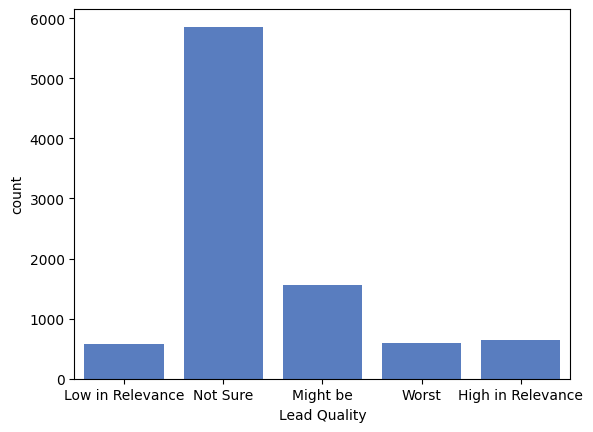

In [29]:
sns.countplot(data=df_leads, x='Lead Quality', orient='v')

In [20]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.

df_leads['Lead Quality'] = df_leads['Lead Quality'].replace(np.nan, 'Not Sure')

<Axes: xlabel='Lead Quality', ylabel='count'>

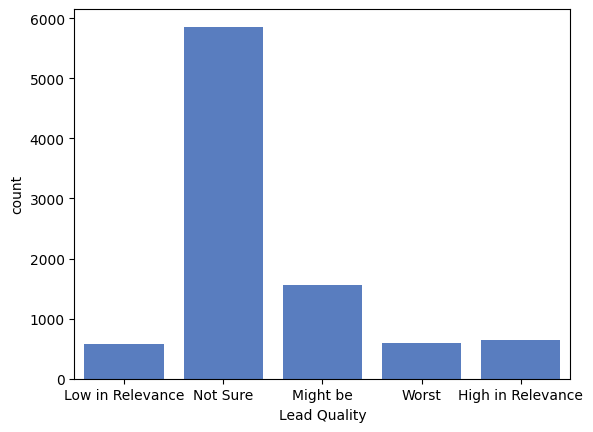

In [30]:
sns.countplot(data=df_leads, x='Lead Quality', orient='v')

There is too much variation in thes parameters so its not reliable to impute any value in it. Hence we need to drop columns with more than 45% Null Values.

In [22]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [23]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

__City__

In [24]:
df_leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

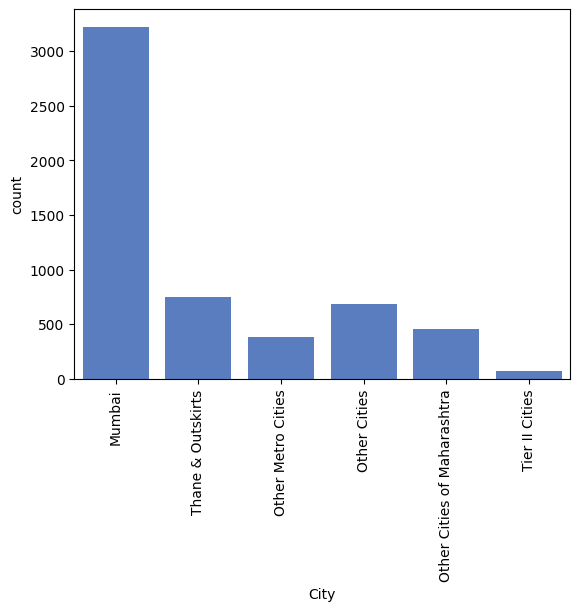

In [31]:
sns.countplot(data=df_leads, x='City', orient='v')
plt.xticks(rotation=90)

Around 60% of the data is Mumbai. Hence we are imputing Mumbai in the missing values.

In [32]:
df_leads['City'] = df_leads['City'].replace(np.nan, 'Mumbai')

__Specialization__

In [33]:
df_leads.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

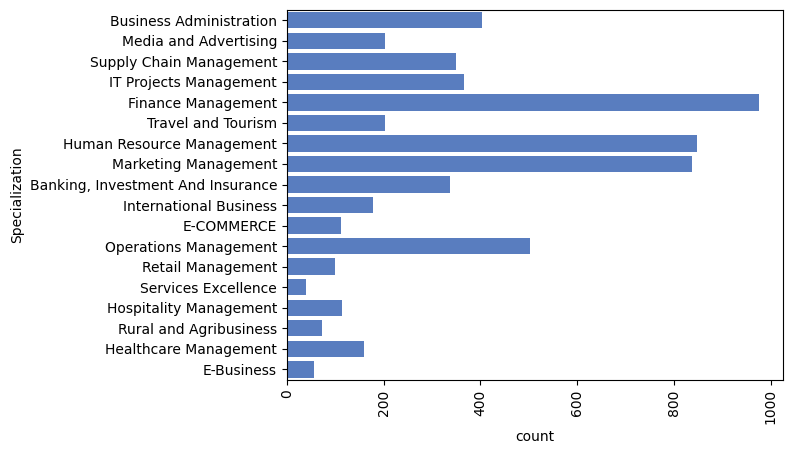

In [35]:
sns.countplot(df_leads.Specialization)
xticks(rotation = 90)

If the lead's selection is not available on the list, he or she may not have a specialization, be a student, or not have entered any specialization at all. Thus, we can create a "Others" category to hold missing values.

In [36]:
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')

In [37]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

__Tags__

In [38]:
df_leads.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]),
 [Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000'),
  Text(2250.0, 0, '2250')])

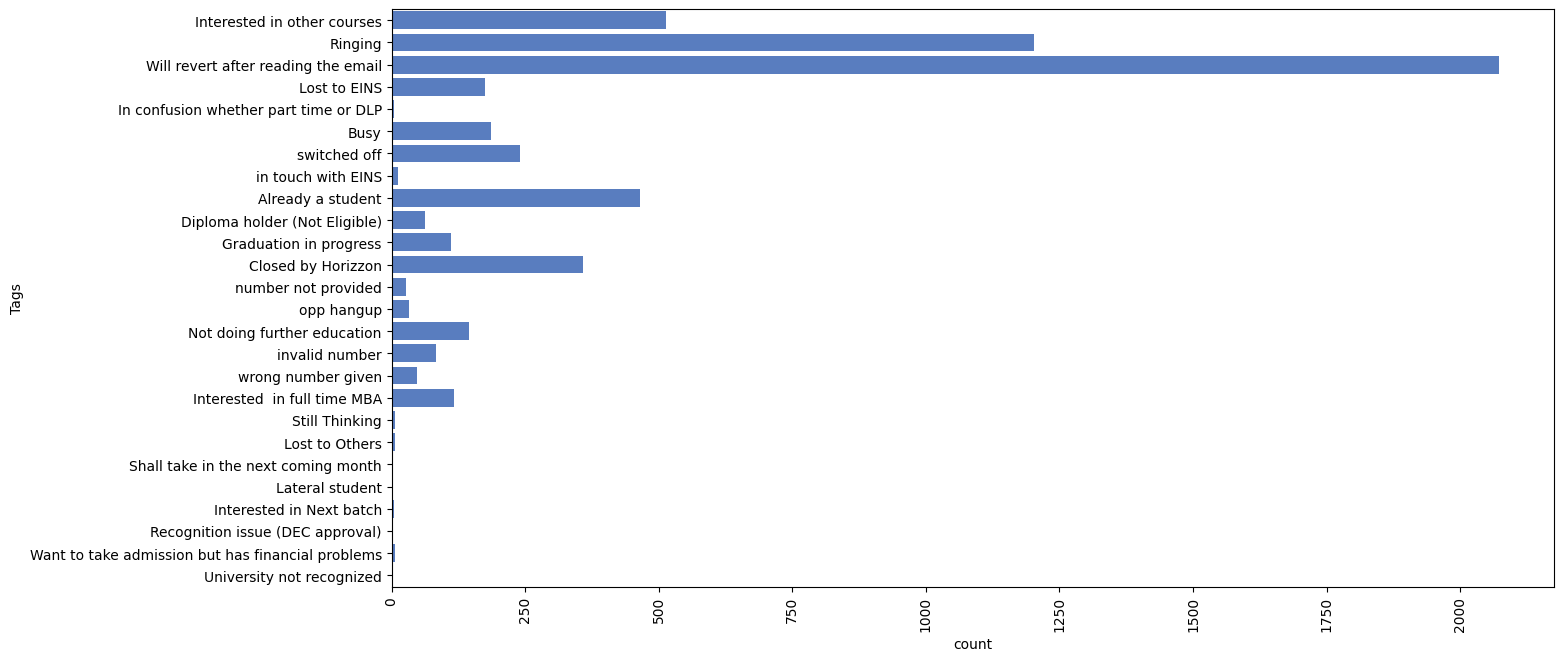

In [39]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(df_leads.Tags)
xticks(rotation = 90)

Null values in the Tag column can be imputed by 'Will revert after reading the email'.


In [40]:
df_leads['Tags'] = df_leads['Tags'].replace(np.nan, 'Will revert after reading the email')

__What matters most to you in choosing a course__

In [41]:
df_leads['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [42]:
# Null Values in this column can be imputed by 'Better Career Prospects'.

df_leads['What matters most to you in choosing a course'] = df_leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

__What is your current occupation__

In [43]:
df_leads['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

86% entries are of Unemployed. Hence we can impute "Unemployed" in Null Values.


In [44]:
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.nan, 'Unemployed')

__Country__

In [45]:
# Country is India for most values so let's impute the same in the missing values.

df_leads['Country'] = df_leads['Country'].replace(np.nan, 'India')

In [46]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [47]:
# Rest missing values are under 2% so we can drop these rows.

df_leads.dropna(inplace = True)

In [48]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

The data is now clean. Hence we can proceed with EDA


## Exploratory Data Analysis

### Univariate Analysis

__Converted__

In [49]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

Converted = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
Converted

37.41109530583215

__Lead Origin__

([0, 1, 2, 3],
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

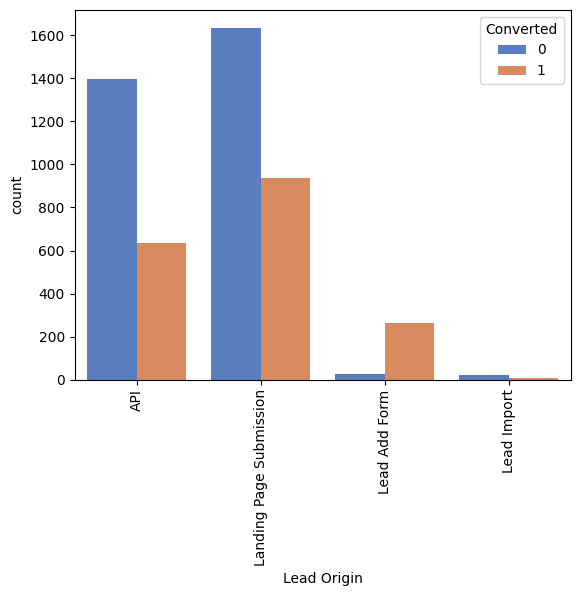

In [51]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = df_leads)
xticks(rotation = 90)

__Observations__

API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.

Lead Add Form has more than 90% conversion rate but count of lead are not very high.

Lead Import are very less in count.

_To improve overall lead conversion rate, the focus will be on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form._

__Lead Source__

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'Press_Release'),
  Text(17, 0, 'NC_EDM')])

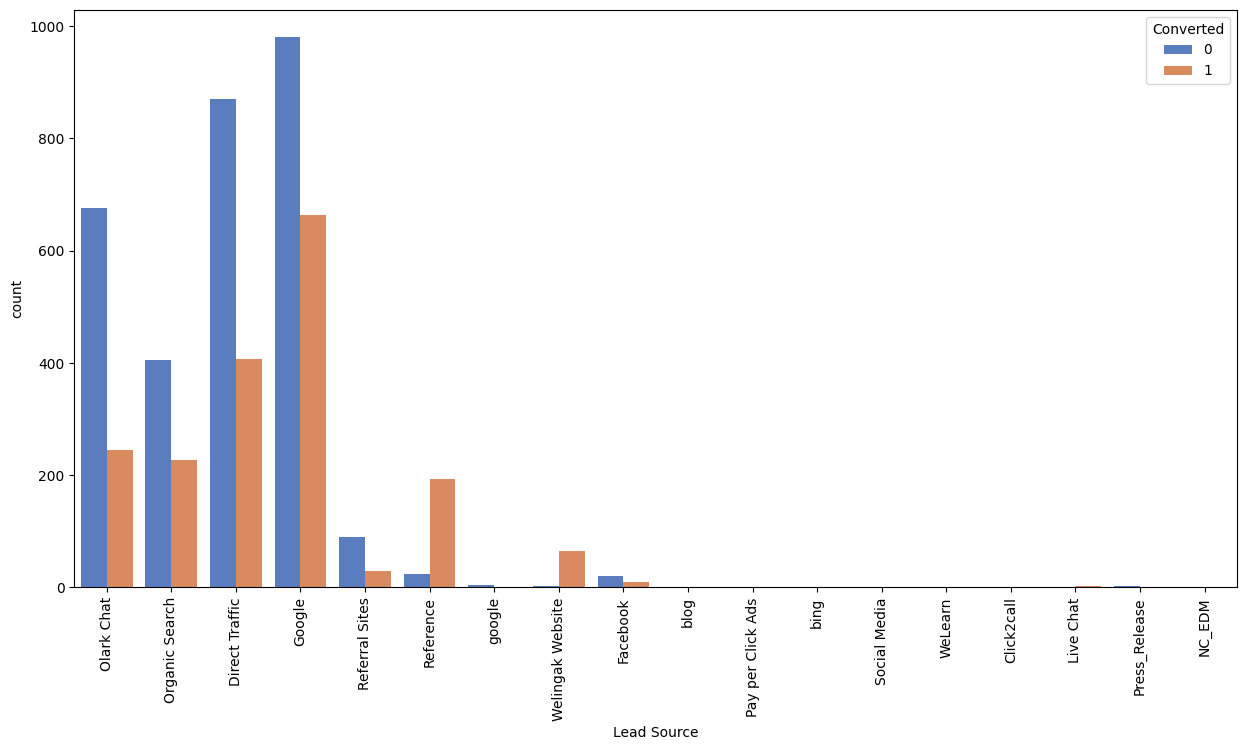

In [52]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df_leads)
xticks(rotation = 90)

In [53]:
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['google'], 'Google')

df_leads['Lead Source'] = df_leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

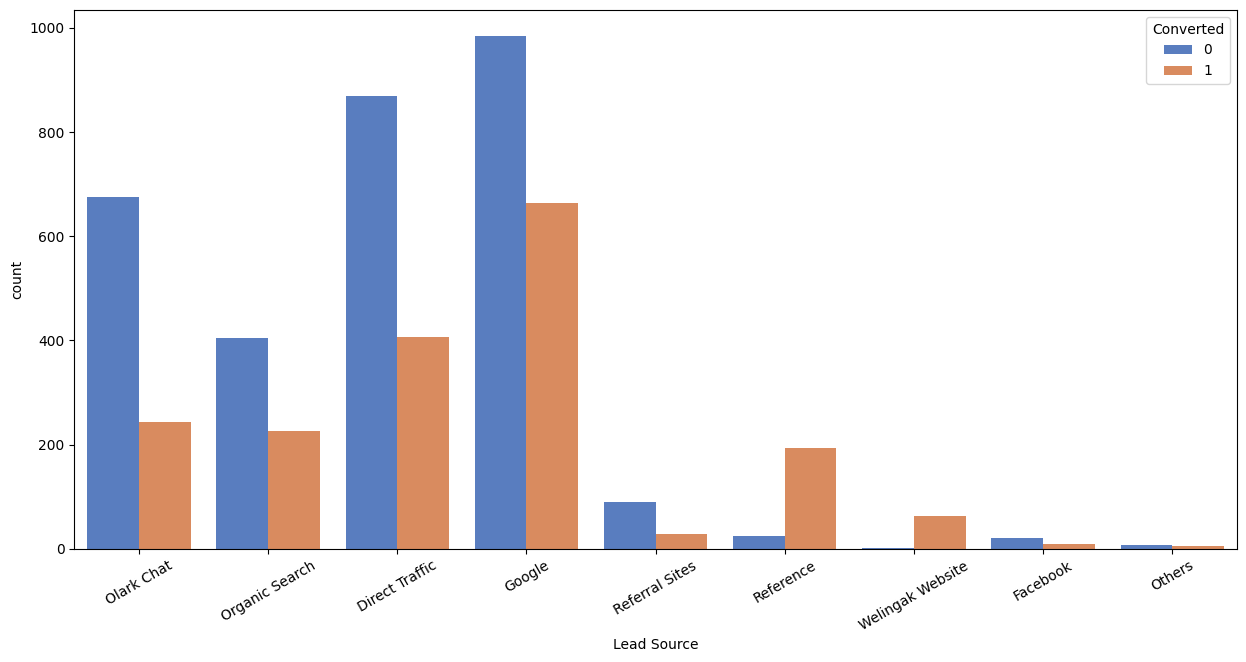

In [54]:
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = df_leads)
xticks(rotation = 30)

__Observations__

Google and Direct traffic generates maximum number of leads.

Conversion Rate of reference leads and leads through welingak website is high.

_To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website._

__Do Not Email & Do Not Call__

<Axes: xlabel='Do Not Call', ylabel='count'>

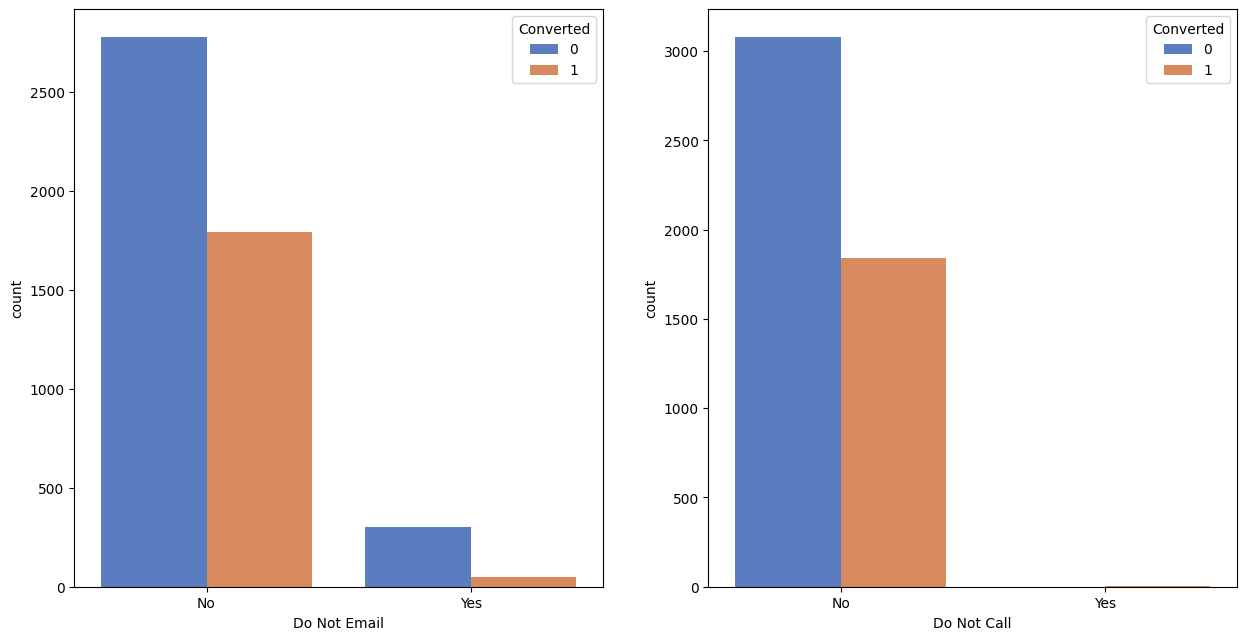

In [55]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df_leads, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df_leads, ax = axs[1])

__Total Visits__

In [56]:
df_leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    4921.000000
mean        3.564926
std         4.201033
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        18.000000
max       141.000000
Name: TotalVisits, dtype: float64

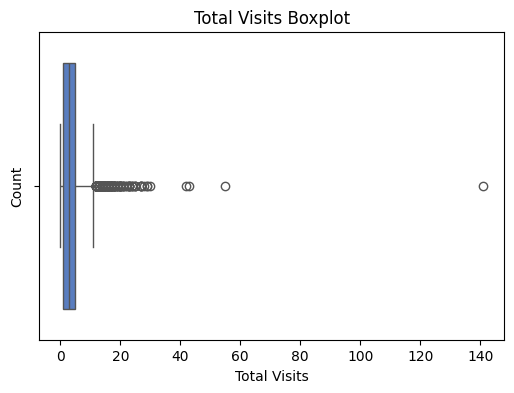

In [57]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='TotalVisits', data=df_leads, orient='h')
plt.title('Total Visits Boxplot')
plt.xlabel('Total Visits')
plt.ylabel('Count')
plt.show()

__Observation:__

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [58]:
percentiles = df_leads['TotalVisits'].quantile([0.05,0.95]).values
df_leads['TotalVisits'][df_leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
df_leads['TotalVisits'][df_leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

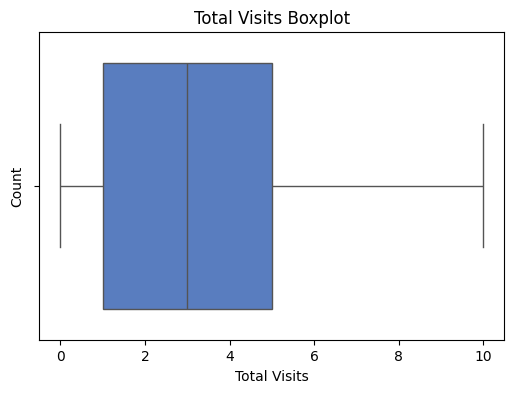

In [59]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_leads['TotalVisits'], orient='h')  # Set orient='h' for horizontal orientation
plt.title('Total Visits Boxplot')
plt.xlabel('Total Visits')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

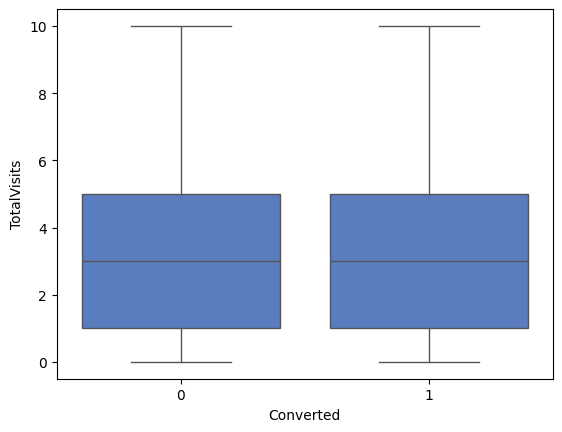

In [60]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)

Median for Converted and Non-Converted Leads are the same. Hence, Total visits are of no importance for further analysis.

__Total time spent on website__

In [61]:
df_leads['Total Time Spent on Website'].describe()

count    4921.000000
mean      491.016054
std       547.477817
min         0.000000
25%        19.000000
50%       255.000000
75%       936.000000
max      2253.000000
Name: Total Time Spent on Website, dtype: float64

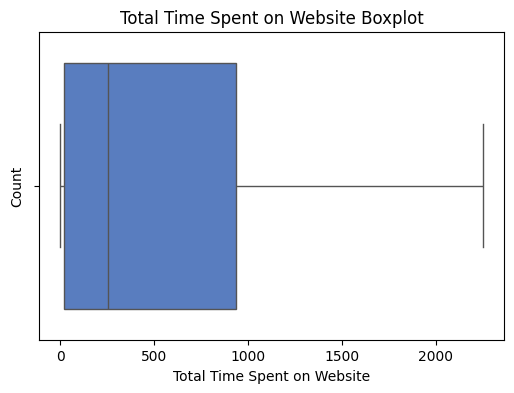

In [62]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_leads['Total Time Spent on Website'], orient='h')  # Set orient='h' for horizontal orientation
plt.title('Total Time Spent on Website Boxplot')
plt.xlabel('Total Time Spent on Website')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

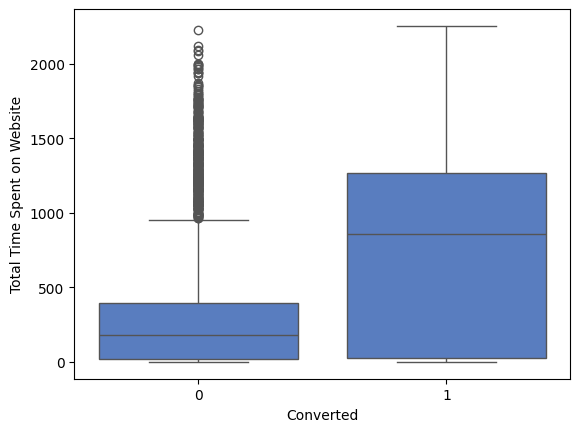

In [63]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

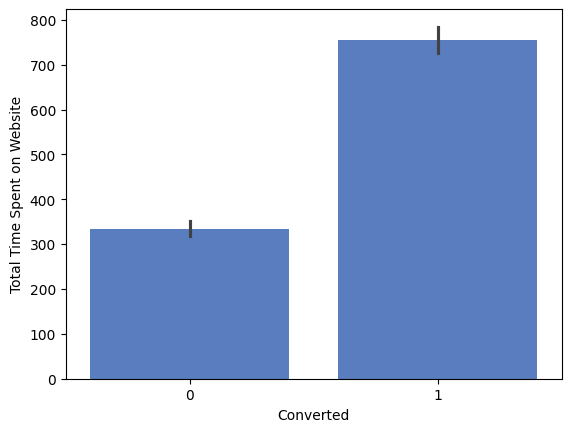

In [64]:
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)

__Observation__

Leads that are spending more time on the weblise will be more likely to be converted.

_Website should be more engaging to make leads spend additional time._

__Page views per visit__

In [65]:
df_leads['Page Views Per Visit'].describe()

count    4921.000000
mean        2.408069
std         2.212106
min         0.000000
25%         1.000000
50%         2.000000
75%         3.330000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: xlabel='Page Views Per Visit'>

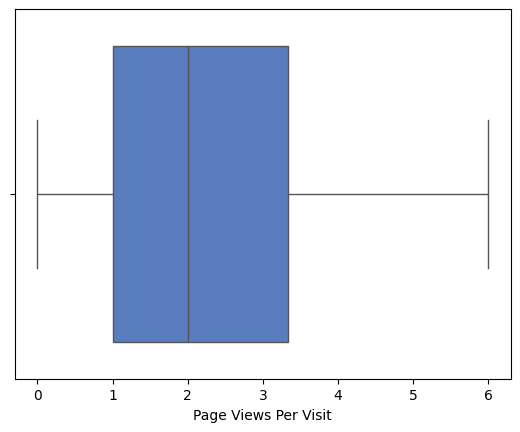

In [72]:
sns.boxplot(x=df_leads['Page Views Per Visit'])

The data has several outliers, as can be seen. For analytical purposes, we shall cap the outliers at 95% value.

In [69]:
percentiles = df_leads['Page Views Per Visit'].quantile([0.05,0.95]).values
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='Page Views Per Visit'>

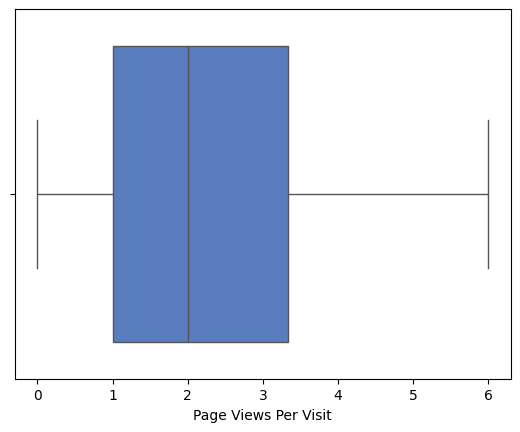

In [71]:
sns.boxplot(x=df_leads['Page Views Per Visit'])

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

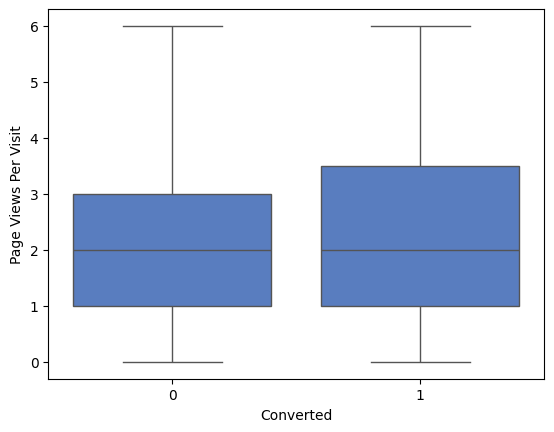

In [73]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)

There is no definitive information regarding Page Views Per Visit because the median appears to be the same for converted and non-converted.

__Last Activity__

In [74]:
df_leads['Last Activity'].describe()

count             4921
unique              16
top       Email Opened
freq              1987
Name: Last Activity, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

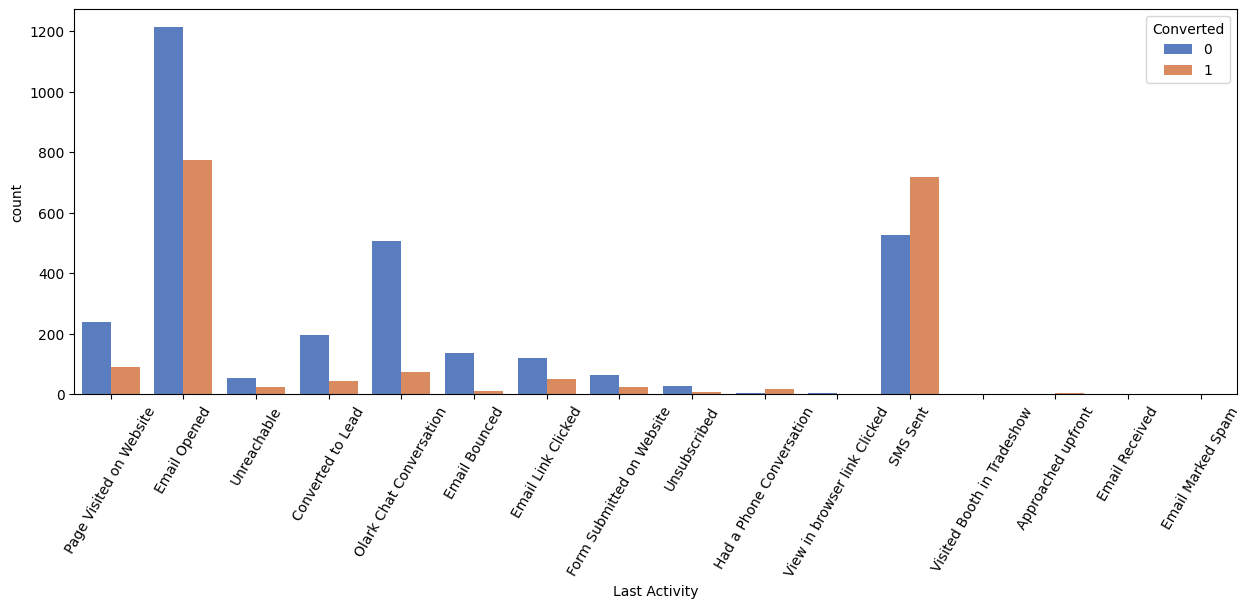

In [75]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df_leads)
xticks(rotation = 60)

In [76]:
# Let's keep considerable Last Activities the same and combine all others in "Other_Activity"

df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

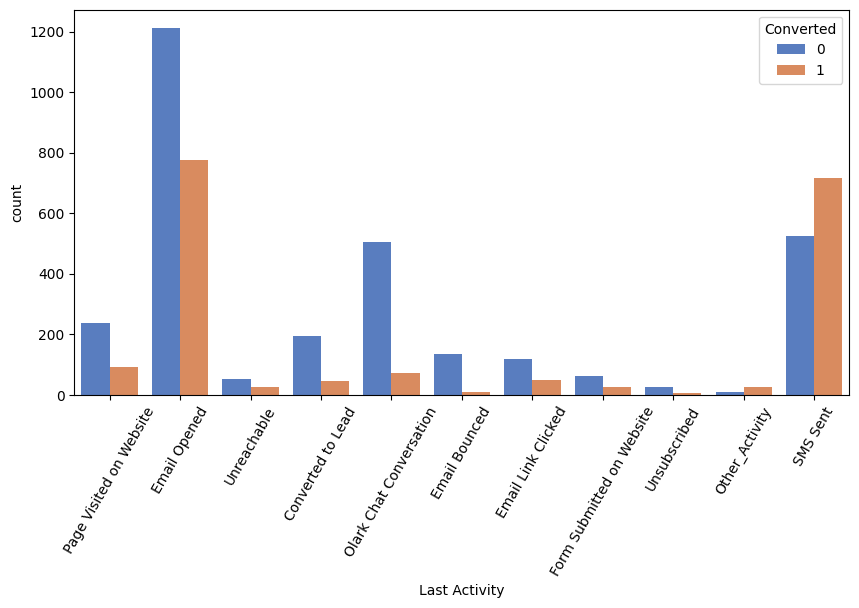

In [77]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df_leads)
xticks(rotation = 60)

__Observations__

Most of the leads have their Email opened as their last activity.

Conversion rate for leads with last activity as SMS Sent is almost 60%.

__Country__

In [78]:
df_leads.Country.describe()

count      4921
unique       33
top       India
freq       4755
Name: Country, dtype: object

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000')])

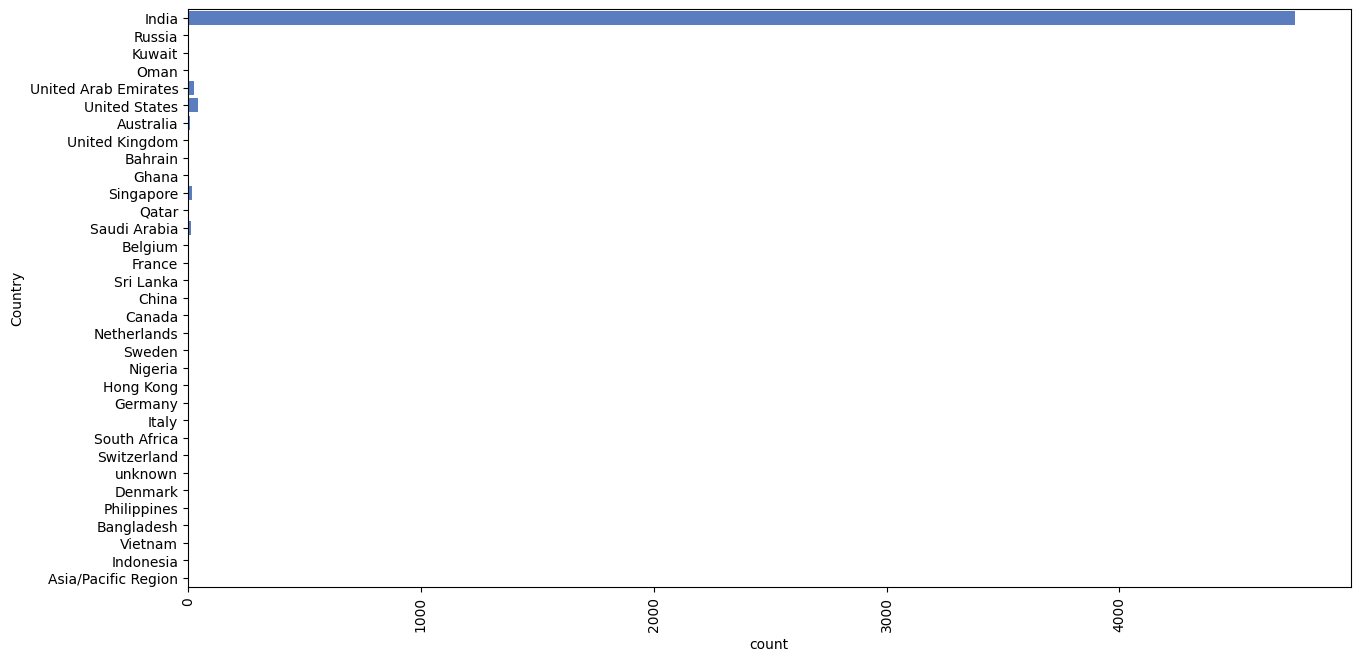

In [79]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(df_leads.Country)
xticks(rotation = 90)

As most values are 'India' no onservation can be made

__Specialization__

In [81]:
df_leads.Specialization.describe()

count       4921
unique        19
top       Others
freq        1814
Name: Specialization, dtype: object

In [82]:
df_leads['Specialization'] = df_leads['Specialization'].replace(['Others'], 'Other_Specialization')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Other_Specialization'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

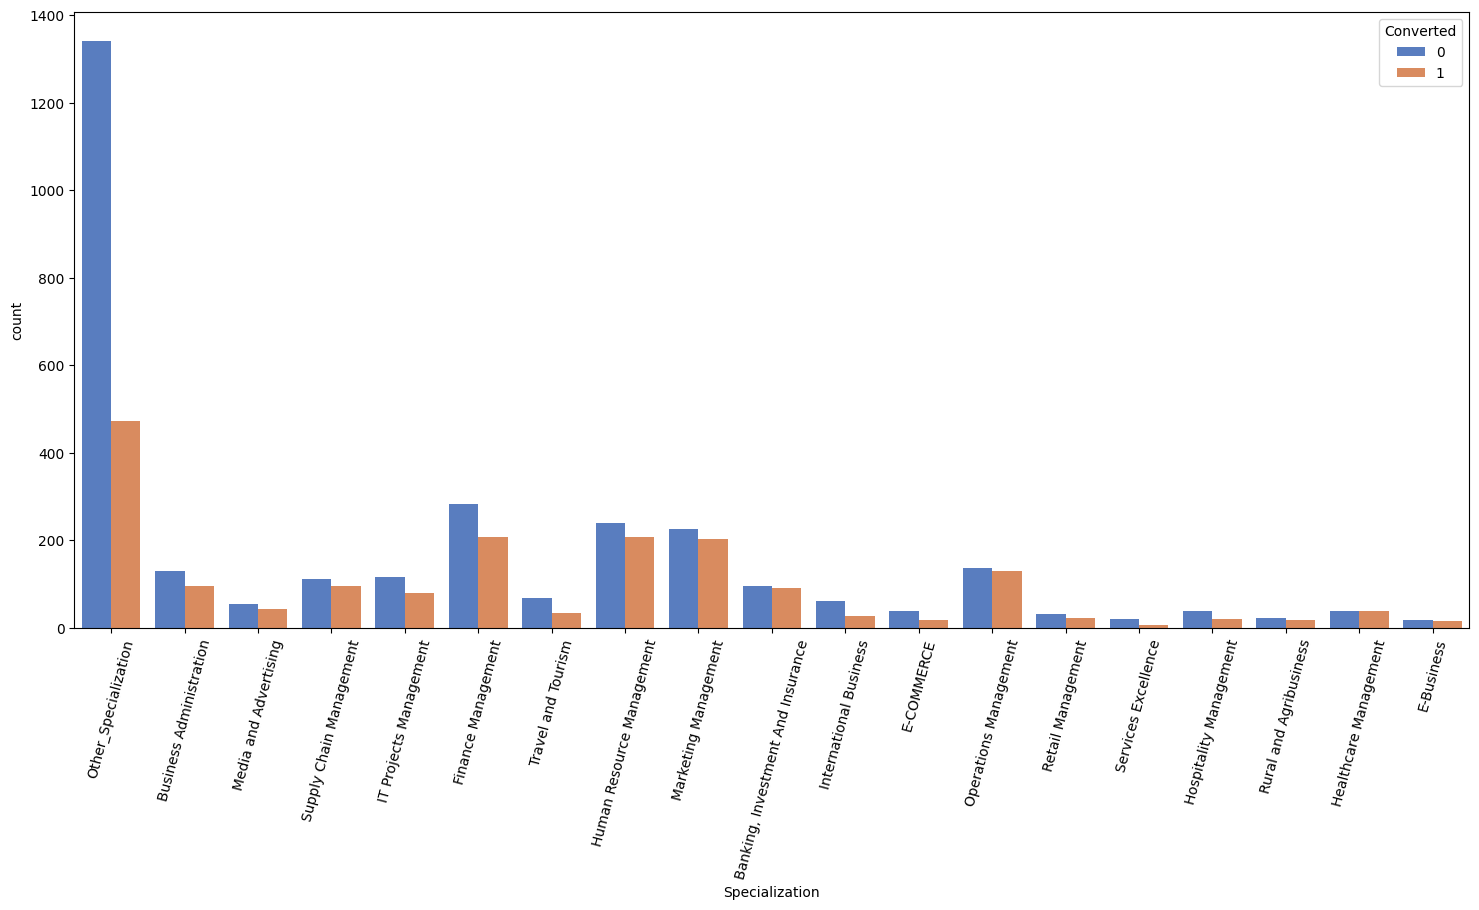

In [83]:
fig, axs = plt.subplots(figsize = (18,8))
sns.countplot(x = "Specialization", hue = "Converted", data = df_leads)
xticks(rotation = 75)

__Observations:__

Focus should be more on the Specialization with high conversion rate.

_We can focus here on Management related Professions_

__What is your current cccupation__

In [85]:
df_leads['What is your current occupation'].describe()

count           4921
unique             6
top       Unemployed
freq            4441
Name: What is your current occupation, dtype: object

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

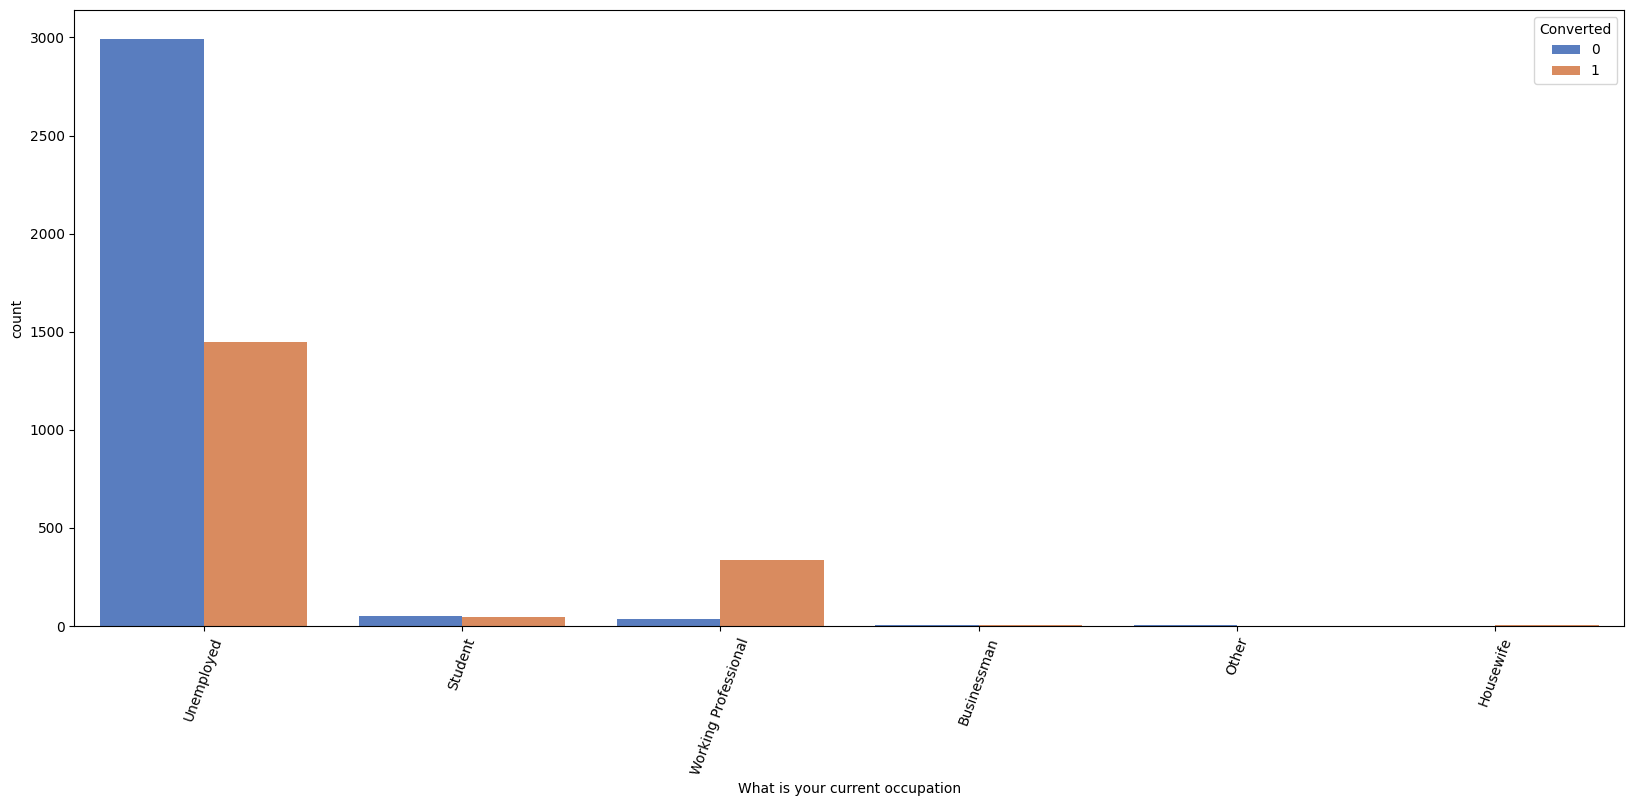

In [87]:
fig, axs = plt.subplots(figsize = (20,8))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df_leads)
xticks(rotation = 70)

__Observation__

Professionals in the workforce who enroll in the course have good conversion rates

The majority of leads are unemployed, yet their conversion rate is only between 30 and 35 percent.

__Tag__

In [88]:
df_leads.Tags.describe()

count                                    4921
unique                                     25
top       Will revert after reading the email
freq                                     2832
Name: Tags, dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Want to take admission but has financial problems'),
  Text(21, 0, 'University not recognize

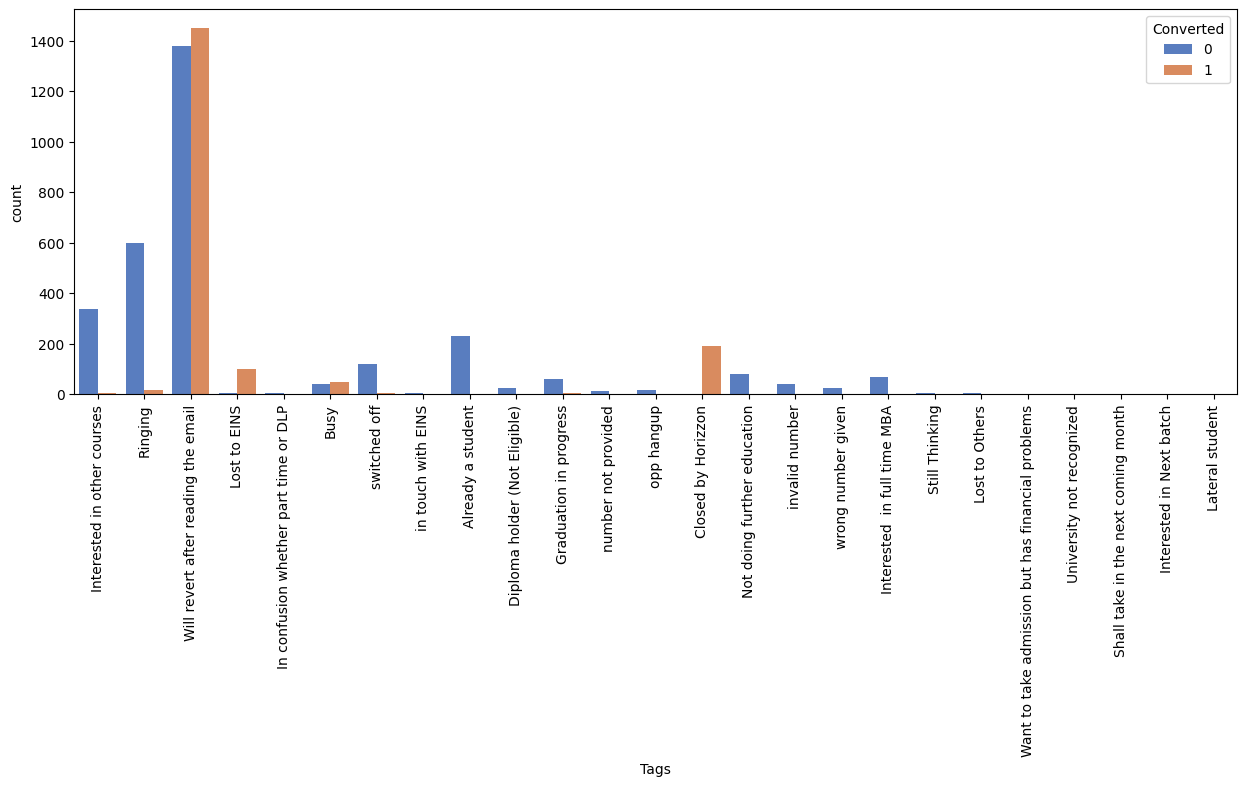

In [90]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = df_leads)
xticks(rotation = 90)

In [91]:
# Let's keep considerable last activities the same and combine all others in "Other_Activity"

df_leads['Tags'] = df_leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'Other_Tags'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'Already a student'),
  Text(8, 0, 'Closed by Horizzon'),
  Text(9, 0, 'Not doing further education'),
  Text(10, 0, 'invalid number'),
  Text(11, 0, 'wrong number given'),
  Text(12, 0, 'Interested  in full time MBA')])

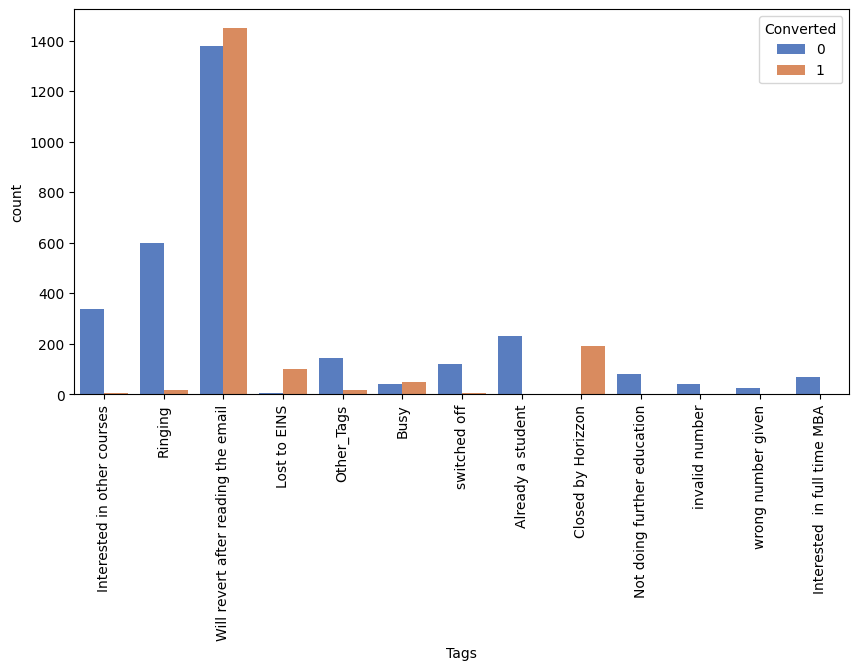

In [92]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = df_leads)
xticks(rotation = 90)

__Lead Quality__

In [93]:
df_leads['Lead Quality'].describe()

count         4921
unique           5
top       Not Sure
freq          3143
Name: Lead Quality, dtype: object

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Not Sure'),
  Text(2, 0, 'Might be'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

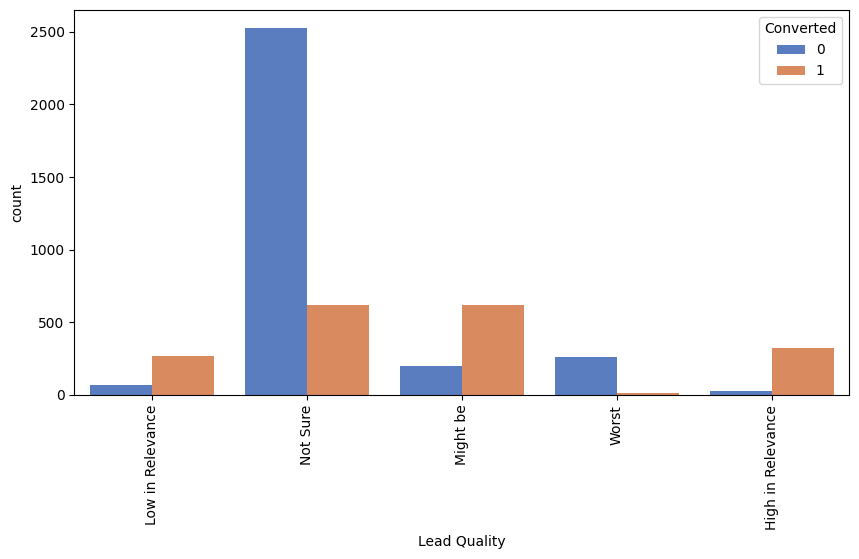

In [94]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = df_leads)
xticks(rotation = 90)

__City__

In [96]:
df_leads.City.describe()

count       4921
unique         6
top       Mumbai
freq        3674
Name: City, dtype: object

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

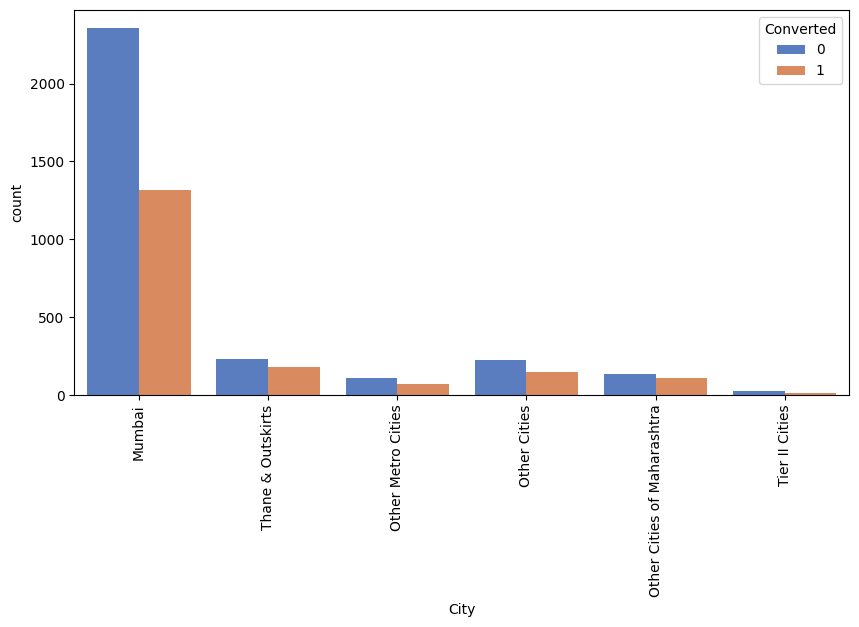

In [97]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = df_leads)
xticks(rotation = 90)

Most leads are from Mumbai with the conversion rate of around 30%.

__Last Notable Activity__

In [98]:
df_leads['Last Notable Activity'].describe()

count         4921
unique          13
top       Modified
freq          2101
Name: Last Notable Activity, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Email Received'),
  Text(12, 0, 'Email Marked Spam')])

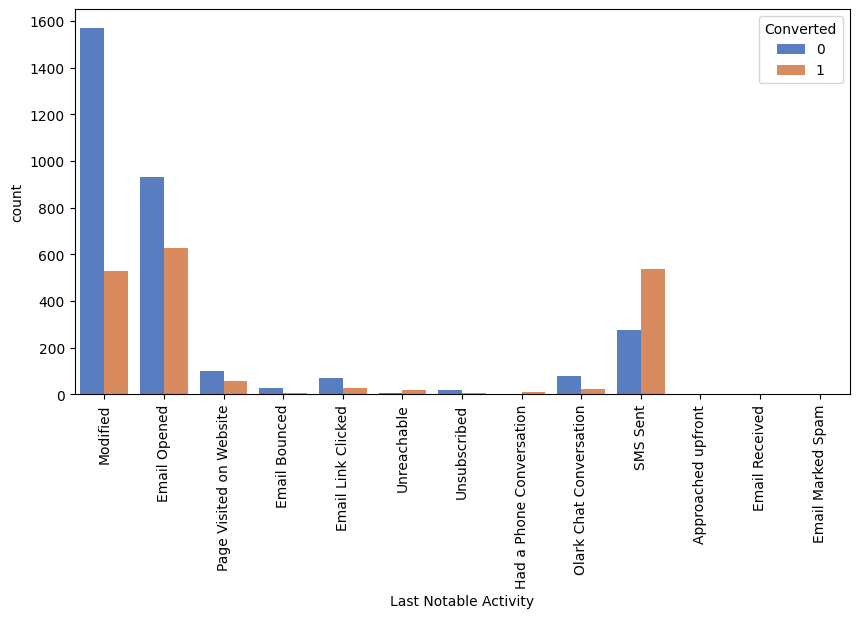

In [99]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df_leads)
xticks(rotation = 90)

Numerous columns are not contributing any values to the procedure, according to Univariate analysis. It would be best to remove these columns.


In [100]:
columns_to_drop = ['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country', 'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Do Not Call','Do Not Email']

df_leads = df_leads.drop(columns=columns_to_drop)

### No Observations can be made based on the below mentioned Parameters

1. What matters most to you in choosing a course - Most entries are 'Better Career Prospects'.
2. Search - Most entries are 'No'
3. Magazine - Most entries are 'No'
4. Newspaper Article - Most entries are 'No'
5. X Education Forums - Most entries are 'No'
6. Newspaper - Most entries are 'No'
7. Digital Advertisement - Most entries are 'No'
8. Through Recommendations - Most entries are 'No'
9. Receive More Updates About Our Courses - Most entries are 'No'
10. Update me on Supply Chain Content - Most entries are 'No'
11. Get updates on DM Content - Most entries are 'No'
12. I agree to pay the amount through cheque - Most entries are 'No'
13. A free copy of Mastering The Interview - Most entries are 'No'

In [103]:
df_leads.shape

(4921, 14)

In [104]:
df_leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


### Data Preparation

For categorical variables with multiple levels, creating dummy features (one-hot encoded)

In [105]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(df_leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,Fa

In [106]:
# Adding the results to the master dataframe

df_leads = pd.concat([df_leads, dummy1], axis=1)
df_leads.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will rev

In [107]:
df_leads = df_leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [108]:
df_leads.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [109]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X

X = df_leads.drop(['Prospect ID','Converted'], axis=1)

In [110]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.0,0,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,F

In [111]:
X = X.astype(int)

In [112]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,5,674,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,1532,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,305,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2,1428,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [113]:
# Putting response variable to y

y = df_leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [114]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

__Feature Scaling__

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2378,2.362582,0.866192,0.437597,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8875,-0.104269,-0.887362,-0.675875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4303,-0.104269,0.202978,0.437597,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8299,-0.809084,1.486154,-0.675875,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3612,0.952953,-0.431402,-0.119139,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Model Building

In [116]:
import statsmodels.api as sm

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create an instance of logistic regression
logreg = LogisticRegression()

# Initialize RFE with logistic regression estimator and number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit RFE on training data
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [118]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 53),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 47),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Others', False, 35),
 ('Lead Source_Reference', False, 62),
 ('Lead Source_Referral Sites', False, 64),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 32),
 ('Last Activity_Email Opened', False, 48),
 ('Last Activity_Form Submitted on Website', False, 44),
 ('Last Activity_Olark Chat Conversation', False, 22),
 ('Last Activity_Other_Activity', False, 15),
 ('Last Activity_Page Visited on Website', False, 31),
 ('Last Activity_SMS Sent', False, 9),
 ('Last Activity_Unreachable', False, 23),
 (

In [119]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [120]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Res

In [121]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3444
Model:                            GLM   Df Residuals:                     3428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -885.41
Date:                Sun, 18 Feb 2024   Deviance:                       1770.8
Time:                        20:51:16   Pearson chi2:                 1.73e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5560
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4700      0.326     -4.515      0.000      -2.108      -0.832
Lead Source_Welingak Website                             3.6263      0.765      4.741      0.000       2.127       5.126
Last Activity_Email Bounced                             -1.5264      0.550     -2.775      0.006      -2.605      -0.448
What is your current occupation_Working Professional     1.3131      0.404      3.248      0.001       0.521       2.105
Tags_Busy                                                4.4495      0.459      9.692      0.000       3.550       5.349
Tags_Closed by Horizzon                                 28.3700   1.64e+04      0.002      0.999   -3.22e+04    3.22e+04
Tags_Interested in other courses                        -1.1464      0.583     -1.965      0.049      -2.290      -0.003
Tags_Lost to EINS                                        8.5359      0.797     10.704      0.000       6.973      10.099
Tags_Not doing further education                       -22.0787   2.61e+04     -0.001      0.999   -5.13e+04    5.12e+04
Tags_Ringing                                            -1.9153      0.485     -3.948      0.000      -2.866      -0.964
Tags_Will revert after reading the email                 3.7300      0.345     10.804      0.000       3.053       4.407
Tags_switched off                                       -1.8934      0.751     -2.523      0.012      -3.365      -0.422
Tags_wrong number given                                -23.5477   3.99e+04     -0.001      1.000   -7.81e+04    7.81e+04
Lead Quality_Not Sure                                   -3.6616      0.178    -20.581      0.000      -4.010      -3.313
Lead Quality_Worst                                      -2.9170      0.752     -3.881      0.000      -4.390      -1.444
Last Notable Activity_SMS Sent                           2.5237      0.183     13.795      0.000       2.165       2.882
========================================================================================================================
"""

In [122]:
# Dropping the column 'Tags_wrong number given'
col1 = col.drop('Tags_wrong number given',1)

In [123]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3444
Model:                            GLM   Df Residuals:                     3429
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -887.60
Date:                Sun, 18 Feb 2024   Deviance:                       1775.2
Time:                        20:51:37   Pearson chi2:                 1.71e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5555
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6140      0.325     -4.960      0.000      -2.252      -0.976
Lead Source_Welingak Website                             3.6243      0.765      4.739      0.000       2.125       5.123
Last Activity_Email Bounced                             -1.5263      0.551     -2.773      0.006      -2.605      -0.447
What is your current occupation_Working Professional     1.3249      0.405      3.268      0.001       0.530       2.119
Tags_Busy                                                4.5958      0.458     10.031      0.000       3.698       5.494
Tags_Closed by Horizzon                                 28.5101   1.64e+04      0.002      0.999   -3.22e+04    3.22e+04
Tags_Interested in other courses                        -1.0060      0.583     -1.726      0.084      -2.148       0.136
Tags_Lost to EINS                                        8.6749      0.798     10.874      0.000       7.111      10.239
Tags_Not doing further education                       -21.9418   2.62e+04     -0.001      0.999   -5.13e+04    5.13e+04
Tags_Ringing                                            -1.7510      0.482     -3.632      0.000      -2.696      -0.806
Tags_Will revert after reading the email                 3.8751      0.345     11.242      0.000       3.199       4.551
Tags_switched off                                       -1.7282      0.748     -2.310      0.021      -3.195      -0.262
Lead Quality_Not Sure                                   -3.6592      0.178    -20.582      0.000      -4.008      -3.311
Lead Quality_Worst                                      -2.8502      0.753     -3.785      0.000      -4.326      -1.374
Last Notable Activity_SMS Sent                           2.4969      0.181     13.785      0.000       2.142       2.852
========================================================================================================================
"""

In [124]:
# Dropping the column 'Tags_Not doing further education'
col2 = col1.drop('Tags_Not doing further education',1)

In [125]:
# Dropping the column 'Tags_Closed by Horizzon'
col3 = col2.drop('Tags_Closed by Horizzon',1)

In [126]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3444
Model:                            GLM   Df Residuals:                     3430
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -889.18
Date:                Sun, 18 Feb 2024   Deviance:                       1778.4
Time:                        20:52:05   Pearson chi2:                 1.73e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5551
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7523      0.319     -5.495      0.000      -2.377      -1.127
Lead Source_Welingak Website                             3.6262      0.765      4.740      0.000       2.127       5.126
Last Activity_Email Bounced                             -1.5392      0.550     -2.801      0.005      -2.616      -0.462
What is your current occupation_Working Professional     1.3387      0.407      3.292      0.001       0.542       2.136
Tags_Busy                                                4.7299      0.455     10.402      0.000       3.839       5.621
Tags_Closed by Horizzon                                 28.6448   1.64e+04      0.002      0.999   -3.22e+04    3.22e+04
Tags_Interested in other courses                        -0.8735      0.580     -1.506      0.132      -2.010       0.263
Tags_Lost to EINS                                        8.8095      0.796     11.066      0.000       7.249      10.370
Tags_Ringing                                            -1.6195      0.478     -3.386      0.001      -2.557      -0.682
Tags_Will revert after reading the email                 4.0099      0.340     11.801      0.000       3.344       4.676
Tags_switched off                                       -1.5980      0.746     -2.143      0.032      -3.060      -0.136
Lead Quality_Not Sure                                   -3.6563      0.178    -20.579      0.000      -4.005      -3.308
Lead Quality_Worst                                      -2.8046      0.750     -3.738      0.000      -4.275      -1.334
Last Notable Activity_SMS Sent                           2.5047      0.181     13.812      0.000       2.149       2.860
========================================================================================================================
"""

In [127]:
X_train_sm = sm.add_constant(X_train[col3])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3444
Model:                            GLM   Df Residuals:                     3431
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1017.9
Date:                Sun, 18 Feb 2024   Deviance:                       2035.9
Time:                        20:52:15   Pearson chi2:                 1.78e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5205
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6616      0.158      4.197      0.000       0.353       0.971
Lead Source_Welingak Website                             4.6094      0.765      6.026      0.000       3.110       6.109
Last Activity_Email Bounced                             -1.8093      0.524     -3.454      0.001      -2.836      -0.783
What is your current occupation_Working Professional     1.6152      0.363      4.445      0.000       0.903       2.327
Tags_Busy                                                2.3497      0.344      6.829      0.000       1.675       3.024
Tags_Interested in other courses                        -3.3301      0.518     -6.434      0.000      -4.345      -2.316
Tags_Lost to EINS                                        6.5501      0.745      8.796      0.000       5.091       8.010
Tags_Ringing                                            -3.8468      0.392     -9.820      0.000      -4.615      -3.079
Tags_Will revert after reading the email                 1.6116      0.179      9.016      0.000       1.261       1.962
Tags_switched off                                       -3.8334      0.689     -5.565      0.000      -5.184      -2.483
Lead Quality_Not Sure                                   -3.6430      0.159    -22.933      0.000      -3.954      -3.332
Lead Quality_Worst                                      -4.5615      0.560     -8.144      0.000      -5.659      -3.464
Last Notable Activity_SMS Sent                           2.2482      0.167     13.435      0.000       1.920       2.576
========================================================================================================================
"""

In [128]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2378    0.835897
8875    0.202664
4303    0.202664
8299    0.008239
3612    0.064858
1498    0.347139
9219    0.979933
2414    0.202664
9009    0.019841
8257    0.997842
dtype: float64

In [129]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.83589746, 0.20266413, 0.20266413, 0.00823876, 0.06485776,
       0.34713898, 0.97993251, 0.20266413, 0.01984124, 0.99784227])

In [130]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.835897,2378
1,0,0.202664,8875
2,0,0.202664,4303
3,0,0.008239,8299
4,0,0.064858,3612


In [131]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.835897,2378,1
1,0,0.202664,8875,0
2,0,0.202664,4303,0
3,0,0.008239,8299,0
4,0,0.064858,3612,0


In [132]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2034  108]
 [ 237 1065]]


In [133]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8998257839721254


## Checking for VIF Values

In [134]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,3.03
9,Tags_switched off,2.66
8,Tags_Will revert after reading the email,1.50
2,What is your current occupation_Working Profes...,1.25
5,Tags_Interested in other courses,1.18
10,Lead Quality_Not Sure,1.12
3,Tags_Busy,1.09
7,Tags_Ringing,1.09
1,Last Activity_Email Bounced,1.07
6,Tags_Lost to EINS,1.07


## Metrics beyond Simply Accuracy

In [135]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [136]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

# positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.8179723502304147
0.9495798319327731
0.05042016806722689
0.907928388746803
0.8956406869220608


## Plotting the ROC Curve

A ROC curve shows various things, including: 
- It illustrates the trade-off between specificity and sensitivity, with every increase in sensitivity resulting in a drop in specificity. 
- The test is more accurate if the curve closely matches the top and left borders of the ROC space. 
- The test is less accurate the closer the curve gets to the ROC space's 45-degree diagonal.

In [137]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [138]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

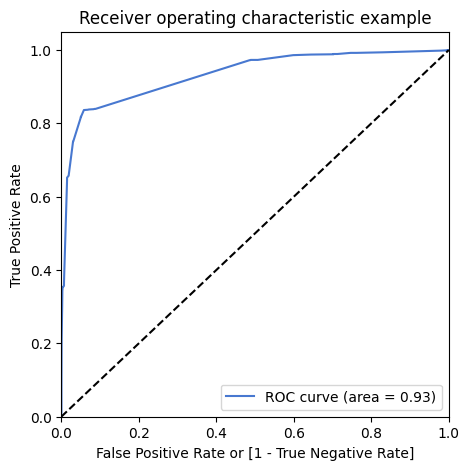

In [139]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## Finding Optimal Cut-Off Point

In [140]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.835897,2378,1,1,1,1,1,1,1,1,1,1,0
1,0,0.202664,8875,0,1,1,1,0,0,0,0,0,0,0
2,0,0.202664,4303,0,1,1,1,0,0,0,0,0,0,0
3,0,0.008239,8299,0,1,0,0,0,0,0,0,0,0,0
4,0,0.064858,3612,0,1,0,0,0,0,0,0,0,0,0


In [141]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378049  1.000000  0.000000
0.1   0.1  0.685830  0.973118  0.511204
0.2   0.2  0.687282  0.972350  0.514006
0.3   0.3  0.896051  0.837174  0.931839
0.4   0.4  0.899826  0.817972  0.949580
0.5   0.5  0.899826  0.817972  0.949580
0.6   0.6  0.899535  0.816436  0.950047
0.7   0.7  0.886760  0.750384  0.969655
0.8   0.8  0.858885  0.658218  0.980859
0.9   0.9  0.856562  0.645161  0.985061


<Axes: xlabel='prob'>

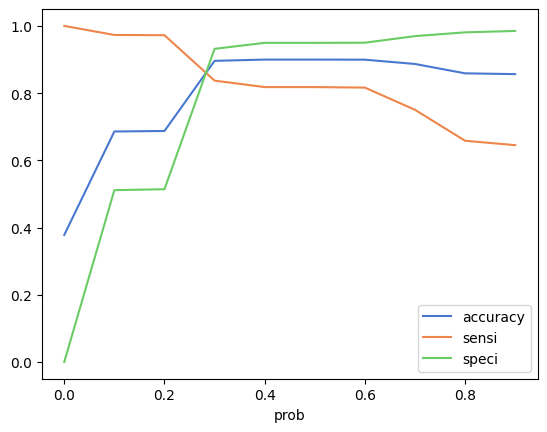

In [143]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

Observation: Based on the aforementioned curve, the ideal cutoff probability is 0.25.

In [144]:
# From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.835897,2378,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.202664,8875,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.202664,4303,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.008239,8299,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.064858,3612,0,1,0,0,0,0,0,0,0,0,0,0


## Assigning Lead Score

In [145]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.835897,2378,1,1,1,1,1,1,1,1,1,1,0,1,84
1,0,0.202664,8875,0,1,1,1,0,0,0,0,0,0,0,0,20
2,0,0.202664,4303,0,1,1,1,0,0,0,0,0,0,0,0,20
3,0,0.008239,8299,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0.064858,3612,0,1,0,0,0,0,0,0,0,0,0,0,6


In [146]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

## Precision and Recall

In [147]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2034,  108],
       [ 237, 1065]], dtype=int64)

In [148]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.907928388746803

In [149]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8179723502304147

In [150]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.907928388746803

In [151]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8179723502304147

## Precision and Recall Trade-Off

In [152]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
 5       0
 6       1
 7       0
 8       0
 9       1
 10      1
 11      0
 12      0
 13      0
 14      1
 15      1
 16      0
 17      1
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      1
 26      1
 27      1
 28      1
 29      0
 30      0
 31      0
 32      0
 33      0
 34      1
 35      1
 36      1
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      1
 45      0
 46      0
 47      1
 48      1
 49      0
 50      0
 51      1
 52      1
 53      1
 54      1
 55      1
 56      0
 57      0
 58      0
 59      1
 60      1
 61      0
 62      0
 63      0
 64      0
 65      1
 66      0
 67      0
 68      1
 69      0
 70      1
 71      0
 72      1
 73      0
 74      0
 75      1
 76      0
 77      0
 78      1
 79      1
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      0
 89      0
 90      0

In [153]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

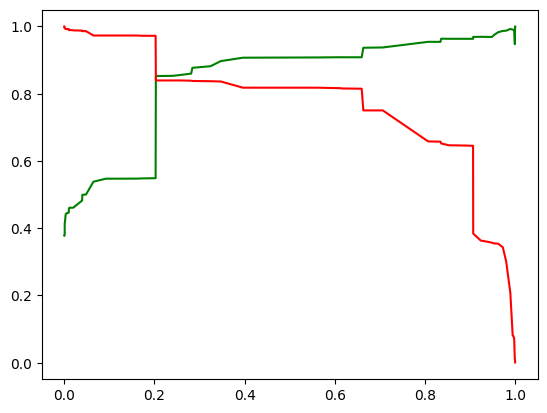

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")

## Making predictions on the Test Set

In [155]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
2378,2.362582,0.866192,0.437597,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8875,-0.104269,-0.887362,-0.675875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4303,-0.104269,0.202978,0.437597,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8299,-0.809084,1.486154,-0.675875,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3612,0.952953,-0.431402,-0.119139,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [156]:
X_test = X_test[col3]
X_test.head()

,Lead Source_Welingak Website,Last Activity_Email Bounced,What is your current occupation_Working Professional,Tags_Busy,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
8499,0,0,0,0,0,0,0,1,0,0,0,1
2391,0,0,0,0,1,0,0,0,0,1,0,0
8717,0,0,0,0,0,0,1,0,0,1,0,0
7601,0,0,0,0,0,0,1,0,0,1,0,1
7448,0,0,1,0,0,0,0,1,0,0,0,1


In [157]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8499    0.989243
2391    0.001812
8717    0.001082
7601    0.010151
7448    0.997842
738     0.202664
7481    0.202664
7750    0.997842
2276    0.001096
1373    0.347139
dtype: float64

In [158]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
8499,0.989243
2391,0.001812
8717,0.001082
7601,0.010151
7448,0.997842


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [160]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,8499,0.989243
1,0,2391,0.001812
2,0,8717,0.001082
3,0,7601,0.010151
4,1,7448,0.997842


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [163]:
# Rearranging the columns
columns_titles = ['Prospect ID','Converted','Converted_prob']
y_pred_final=y_pred_final.reindex(columns=columns_titles)

In [164]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,8499,1,0.989243
1,2391,0,0.001812
2,8717,0,0.001082
3,7601,0,0.010151
4,7448,1,0.997842


In [165]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

In [166]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,8499,1,0.989243,1
1,2391,0,0.001812,0
2,8717,0,0.001082,0
3,7601,0,0.010151,0
4,7448,1,0.997842,1


## Checking the overall Accuracy.

In [167]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8937034529451591

In [168]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[859,  79],
       [ 78, 461]], dtype=int64)

In [169]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

## Calculating the Sensitivity of our Logistic Regression Model

In [170]:
TP / float(TP+FN)

0.8552875695732839

## Calculating the Specificity of Model

In [171]:
TN / float(TN+FP)

0.9157782515991472

## Observations:

__The following numbers are obtained once the model is run on the Train Dataset:__

- Accuracy : 89.98% 
- Sensitivity : 81.79% 
- Specificity : 94.95%

__The following numbers are obtained once the model is run on the Test Dataset:__

- Accuracy : 89.37% 
- Sensitivity : 85.52% 
- Specificity : 91.57%